In [55]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv('btc-market-price.csv',header=None)

In [56]:
df.columns=["Zaman","Değer"]
df.head()

,Zaman,Değer
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [57]:
df["Zaman"] = pd.to_datetime(df["Zaman"])
df.head()

,Zaman,Değer
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [58]:
df.set_index("Zaman", inplace=True)
df.head()

,Değer
Zaman,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [59]:
df.loc["2017-04-02"]

Değer    1099.169125
Name: 2017-04-02 00:00:00, dtype: float64

<AxesSubplot: xlabel='Zaman'>

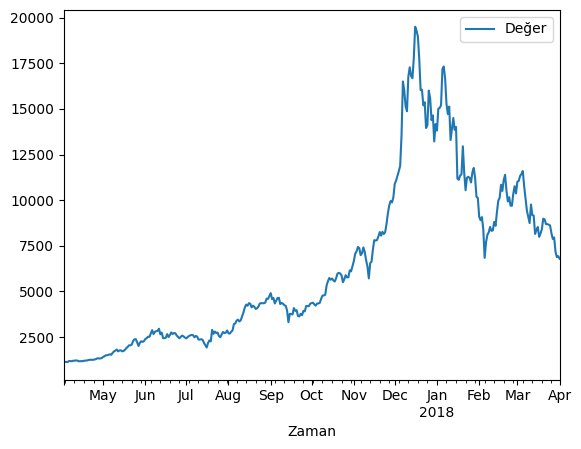

In [68]:
df.plot()

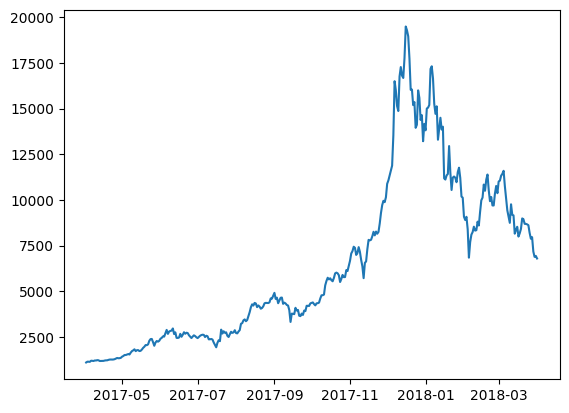

In [69]:
import matplotlib.pyplot as plt
plt.plot(df.index, df["Değer"])

In [72]:
value=np.nan
pd.isnull(value)

True

In [74]:
value=None
pd.notnull(value)

False

In [76]:
series=pd.Series([None,1,5,np.nan])
pd.isnull(series)

0     True
1    False
2    False
3     True
dtype: bool

In [79]:
notlar=pd.Series({"Hasan":None,"Cemal":75,"Aykut":np.nan,"Ege":100})
pd.isnull(notlar)

Hasan     True
Cemal    False
Aykut     True
Ege      False
dtype: bool

In [80]:
notlar.sum()

175.0

In [82]:
notlar[pd.notnull] #sınava girenler serisi

Cemal     75.0
Ege      100.0
dtype: float64

In [85]:
notlar.dropna()

Cemal     75.0
Ege      100.0
dtype: float64

In [93]:
df = pd.DataFrame({
    'Sütun A': [1, np.nan, 30, np.nan],
    'Sütun B': [2, 8, 31, np.nan],
    'Sütun C': [np.nan, 9, 32, 100],
    'Sütun D': [5, 8, 34, 110],
})

df.dropna() #boş değeri olmayan indexi göster

,Sütun A,Sütun B,Sütun C,Sütun D
2,30.0,31.0,32.0,34


In [96]:
df2 = pd.DataFrame({
    'Sütun A': [1, np.nan, 30],
    'Sütun B': [2, np.nan, 31],
    'Sütun C': [np.nan, np.nan, 100]
})
df2.dropna(how="all")#tüm değerleri boş olan indexi çıkar

,Sütun A,Sütun B,Sütun C
0,1.0,2.0,NaN
2,30.0,31.0,100.0


In [97]:
notlar.fillna(50) #sınava girmeyenlerin notu 50 oldu

Hasan     50.0
Cemal     75.0
Aykut     50.0
Ege      100.0
dtype: float64

In [100]:
notlar.fillna(method="ffill")

Hasan      NaN
Cemal     75.0
Aykut     75.0
Ege      100.0
dtype: float64

In [101]:
notlar.fillna(method="bfill")

Hasan     75.0
Cemal     75.0
Aykut    100.0
Ege      100.0
dtype: float64

In [106]:
elciler = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])
print(elciler)
elciler.duplicated(keep=False) #tekrarlanan değerleri gösterir

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object


Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [107]:
elciler.drop_duplicates(keep=False)#tekrarlanmayan değerleri gösterir

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

In [108]:
elciler.drop_duplicates(keep="first")#tekrarlanmayan değerleri gösterir(tekrarlansa da tekrarlananların ilkini gösterir)

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [171]:
d_f = pd.DataFrame({
    'Veri': [
        '1987_E_ABD _1',
        '1990?_E_ING_1',
        '1992_K_ABD_2',
        '1970?_E_   IT_1',
        '1985_K_I  T_2'
]})
d_f=d_f["Veri"].str.split("_",expand=True) #serimiz artk _ gördüğü yerde parçalanıp yeni bir seri halini almıştır


In [172]:
d_f.columns=["Yil","Cinsiyet","Ülke","Çocuk Sayısı"]
d_f

,Yil,Cinsiyet,Ülke,Çocuk Sayısı
0,1987,E,ABD,1
1,1990?,E,ING,1
2,1992,K,ABD,2
3,1970?,E,IT,1
4,1985,K,I T,2


In [173]:
d_f["Yil"].str.contains("/?")

0    True
1    True
2    True
3    True
4    True
Name: Yil, dtype: bool

In [178]:
d_f["Yil"] = d_f["Yil"].str.replace("\?", "")
d_f

C:\Users\warp_\AppData\Local\Temp\ipykernel_8864\2410818316.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  d_f["Yil"] = d_f["Yil"].str.replace("\?", "")


,Yil,Cinsiyet,Ülke,Çocuk Sayısı
0,1987,E,ABD,1
1,1990,E,ING,1
2,1992,K,ABD,2
3,1970,E,IT,1
4,1985,K,I T,2


In [179]:
d_f["Ülke"] = d_f["Ülke"].str.replace(" ", "")
d_f

,Yil,Cinsiyet,Ülke,Çocuk Sayısı
0,1987,E,ABD,1
1,1990,E,ING,1
2,1992,K,ABD,2
3,1970,E,IT,1
4,1985,K,IT,2
